In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Reading dataset using pandas
train = pd.read_csv('train.csv')
train.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [12]:
# Checking for duplicate and null records present in the dataset
print('Duplicate Records : ', train.duplicated().sum())
print()
print('Null Values :\n', train.isnull().sum())

Duplicate Records :  4325

Null Values :
 trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64


In [13]:
# Creating a function to data cleaning
def data_cleaning(data):
    # Drop Duplicate records
    data.drop_duplicates(inplace = True)
    
    # Removing collumns where trip duration is 0
    data.drop(data[data['trip_duration'] == 0].index, axis = 0, inplace = True)
    
    # Creating new feature
    data['speed_kmph'] =  ((data['distance_traveled'] * 1000 / (data['trip_duration'])) * (18/5)).round(4)
    
    return data

In [14]:
data_cleaning(train)

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,speed_kmph
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0,13.2353
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0,10.4027
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1,15.3863
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0,30.2057
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0,22.8693
...,...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0,18.7458
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1,10.6027
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0,17.7793
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0,15.8371


In [15]:
# Checking for duplicate and null records present in the dataset after cleaning the dataset
print('Duplicate Records : ', train.duplicated().sum())
print()
print('Null Values :\n', train.isnull().sum())

Duplicate Records :  0

Null Values :
 trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
speed_kmph            0
dtype: int64


In [19]:
train.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
trip_duration,205315.0,1189.29,4824.67,1.00,454.00,717.00,1110.00,86387.00
distance_traveled,205315.0,5.12,126.54,0.02,2.00,3.25,5.81,57283.91
num_of_passengers,205315.0,1.30,0.94,0.00,1.00,1.00,1.00,9.00
fare,205315.0,100.65,86.13,0.00,52.50,78.75,116.25,4466.25
tip,205315.0,13.25,20.51,0.00,0.00,9.00,20.00,2500.00
miscellaneous_fees,205315.0,15.30,12.62,-0.50,6.00,9.75,26.53,435.00
total_fare,205315.0,129.19,99.27,0.00,73.12,103.50,153.45,4472.25
surge_applied,205315.0,0.29,0.45,0.00,0.00,0.00,1.00,1.00
speed_kmph,205315.0,24.42,347.07,0.00,13.57,17.06,22.26,118928.53


In [22]:
plt.style.use('ggplot')

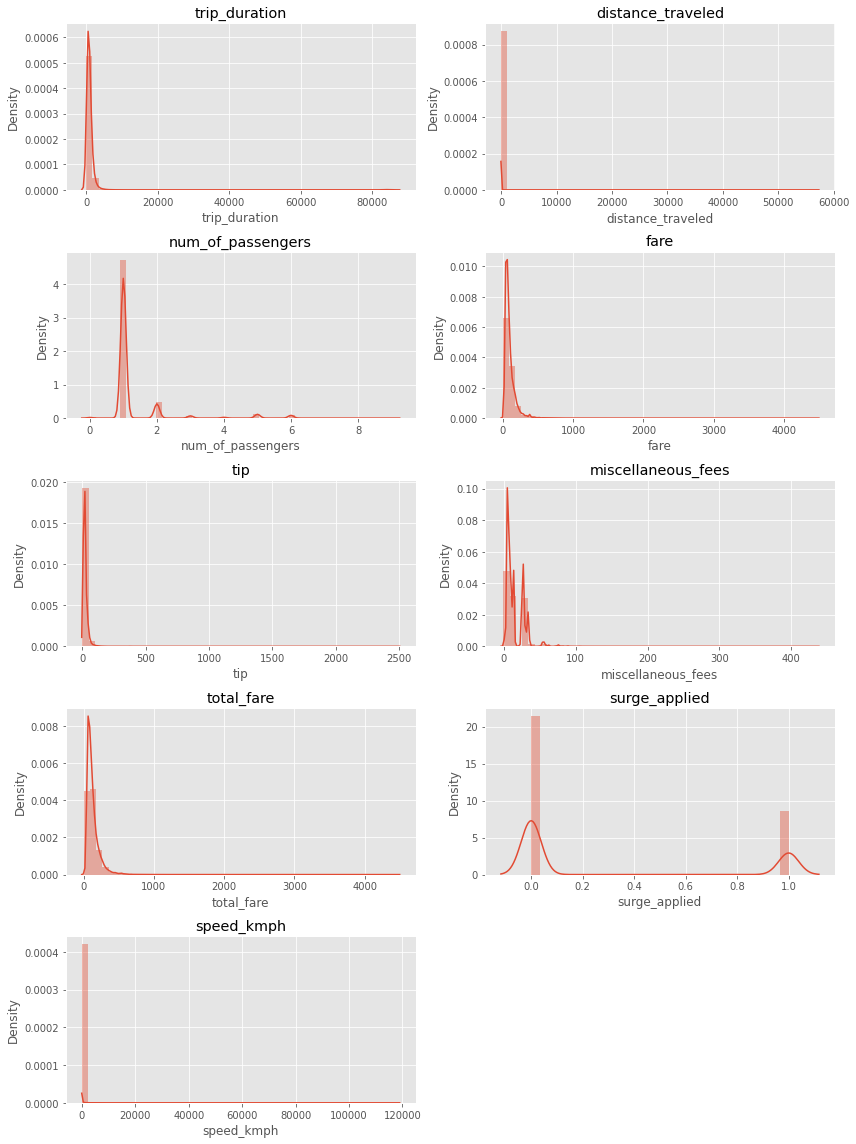

In [54]:
# Plotting distribution plots of all variables in a dataset
plt.figure(figsize = (12, 16), layout = 'tight')
for i in range(len(train.columns)):
    plt.subplot(5,2, i+1)
    sns.distplot(train[train.columns[i]],)
    plt.title(train.columns[i])
plt.show()

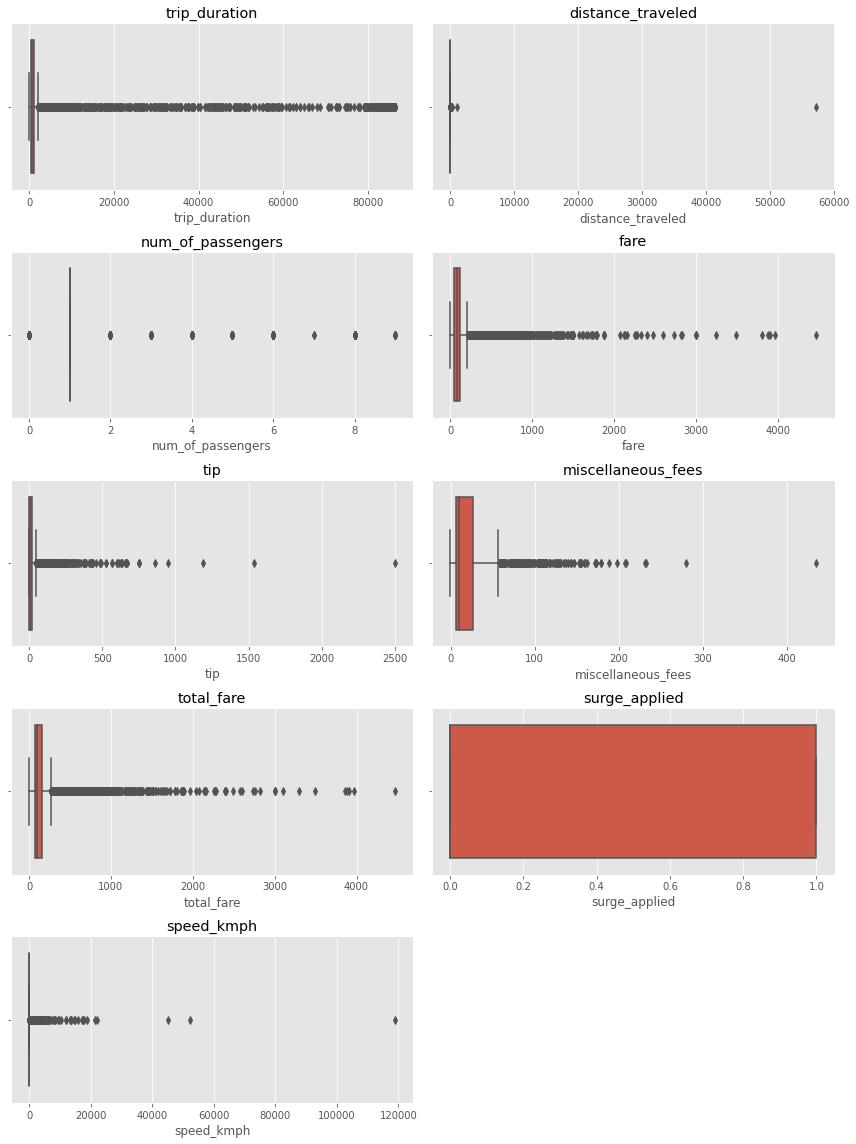

In [57]:
# Plotting boxplots to check for outliers
plt.figure(figsize = (12, 16), layout = 'tight')
for i in range(len(train.columns)):
    plt.subplot(5,2, i+1)
    sns.boxplot(train[train.columns[i]])
    plt.title(train.columns[i])
plt.show()

- From the above distribution plots and boxplots we can observe that there are outliers in this datacand removing these outliers will help in the data normalization

In [58]:
# Create a function to remove outliers from the data
def remove_outliers_from_dataframe(df, columns):

    # Select columns to consider for outlier removal
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns

    # Create a copy of the original DataFrame
    cleaned_df = df.copy()

    # Iterate through selected columns and remove outliers
    for column in columns:
        # Calculate the first and third quartiles (Q1 and Q3)
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)

        # Calculate the interquartile range (IQR)
        iqr = q3 - q1

        # Define the lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Remove outliers from the selected column
        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

    return cleaned_df


In [60]:
# Creating a new_train dataset which do not have any outliers
cols = ['trip_duration', 'distance_traveled', 'fare', 'tip', 'miscellaneous_fees', 'total_fare', 'speed_kmph']
new_train = remove_outliers_from_dataframe(train, columns = cols)

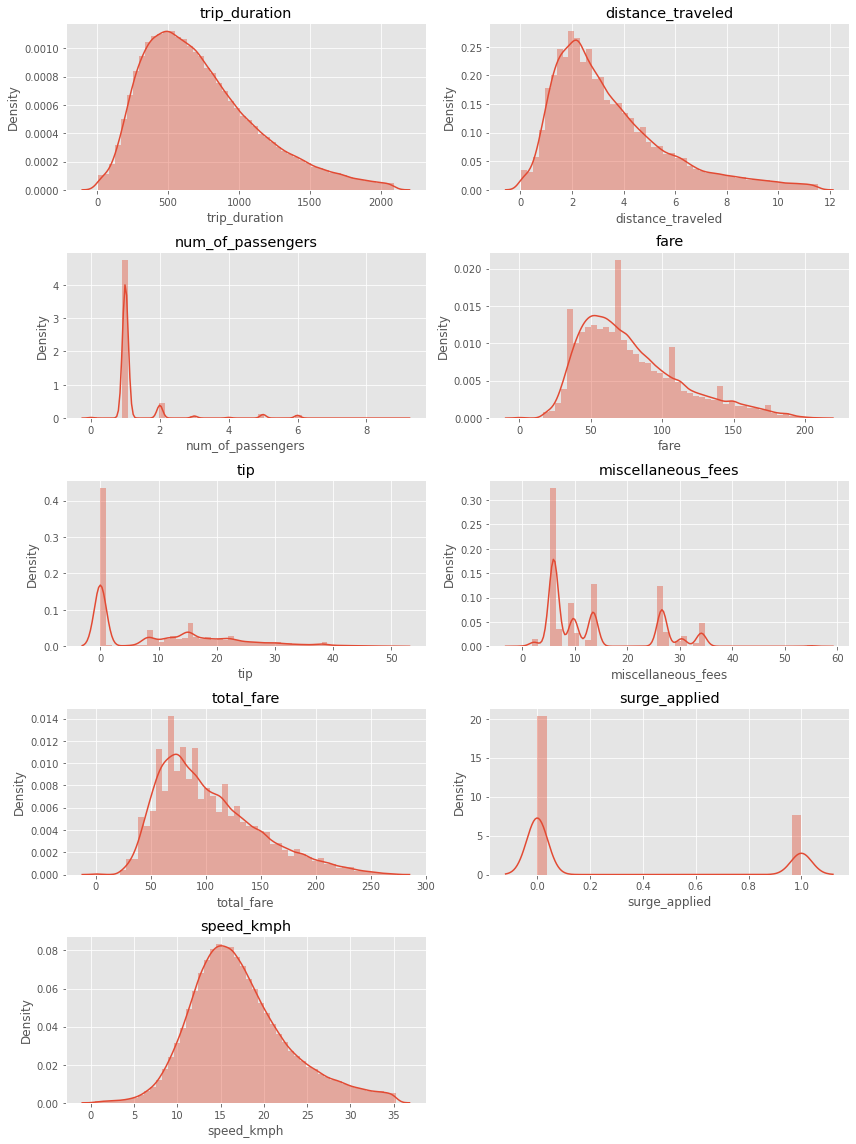

In [62]:
# Plotting the distribution plots again to check if the outliers are removed or not
plt.figure(figsize = (12, 16), layout = 'tight')
for i in range(len(new_train.columns)):
    plt.subplot(5,2, i+1)
    sns.distplot(new_train[new_train.columns[i]])
    plt.title(new_train.columns[i])
plt.show()

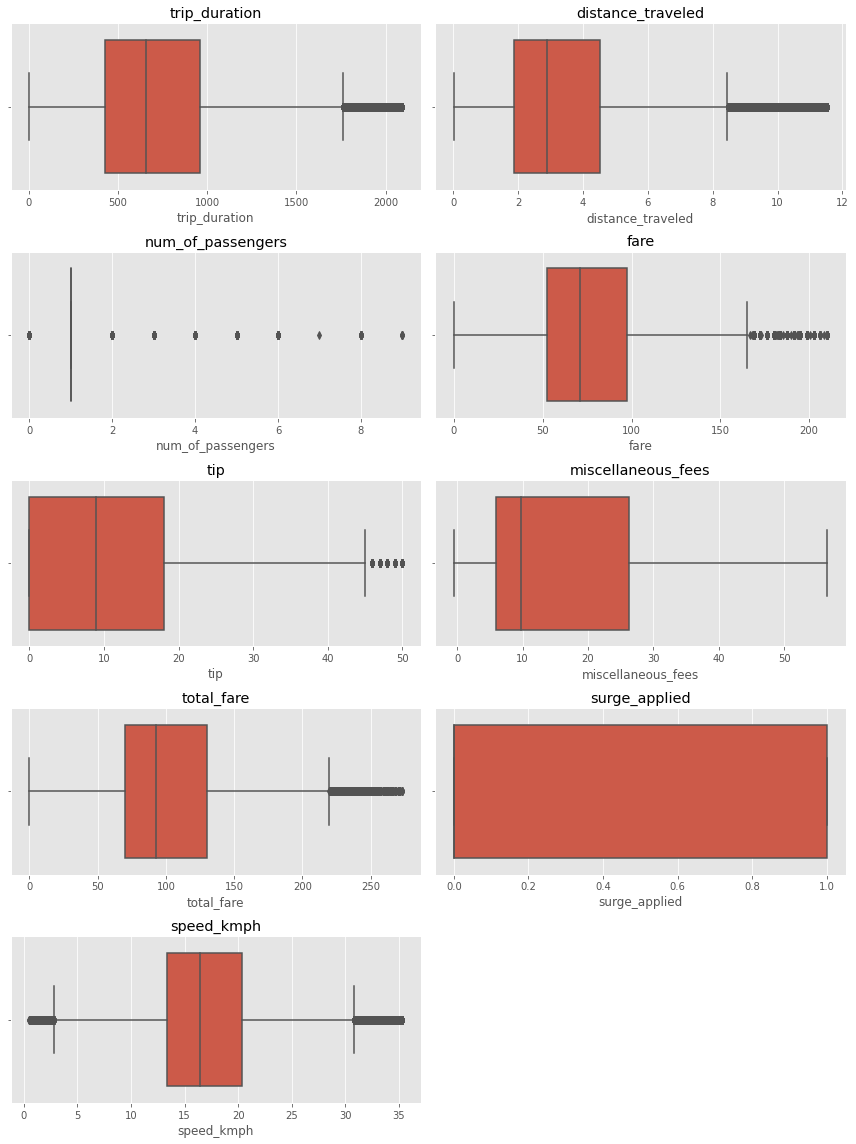

In [63]:
# Plotting boxplots again to check if the outliers are removed or not

plt.figure(figsize = (12, 16), layout = 'tight')
for i in range(len(new_train.columns)):
    plt.subplot(5,2, i+1)
    sns.boxplot(new_train[new_train.columns[i]])
    plt.title(new_train.columns[i])
plt.show()

<Axes: >

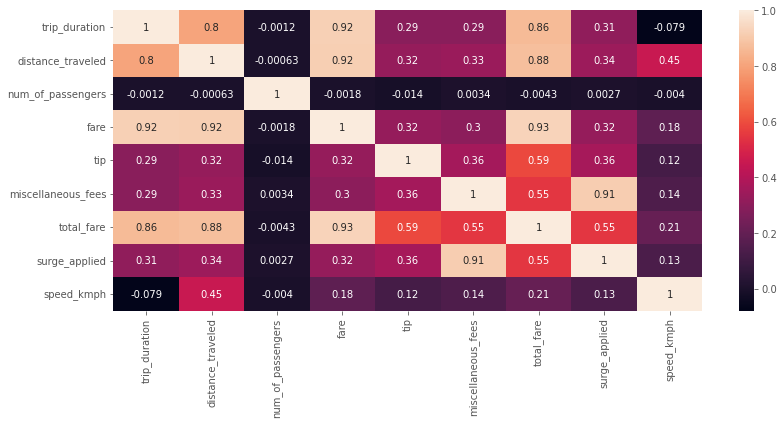

In [67]:
# Plotting a heatmap showing the correlation between the features
plt.figure(figsize =  (12, 6), layout = 'tight')
sns.heatmap(new_train.corr(), annot = True)

- Dropping the 'fare' column also since the target column and 'fare' column is highly correlated and it might affect the predictions after training the model.

In [68]:
# Creating new datasets for dependent and independent variables
X = new_train.drop(['total_fare', 'fare'], axis = 1)
Y = new_train[['total_fare']].values

# Scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 100)

print('Training Features Shape : ', x_train.shape)
print('Training Labels Shape   : ', y_train.shape)
print('Testing Features Shape : ', x_test.shape)
print('Testing Labels Shape   : ', y_test.shape)

In [74]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Decision Tree


In [76]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(max_depth = 500, random_state = 42)
dt_regressor.fit(x_train, y_train)

dt_pred_train = dt_regressor.predict(x_train)
dt_pred_test = dt_regressor.predict(x_test)

print('Training Score : ', r2_score(y_train, dt_pred_train))
print('Testing Score  : ', r2_score(y_test, dt_pred_test))
print()
print('Mean Absolute Error     : ', mean_absolute_error(y_test, dt_pred_test))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, dt_pred_test)))

Training Score :  0.9997381943234211
Testing Score  :  0.9693139414137188

Mean Absolute Error     :  2.6048749568817122
Root Mean Squared Error :  7.956235255926912


In [79]:
from xgboost import XGBRegressor
xg_regressor = XGBRegressor(n_estimators = 800, max_depth = 300, random_state = 42)
xg_regressor.fit(x_train, y_train)

xg_pred_train = xg_regressor.predict(x_train)
xg_pred_test = xg_regressor.predict(x_test)

print('Training set score : ', r2_score(y_train, xg_pred_train))
print('Testing set score  : ', r2_score(y_test, xg_pred_test))
print()
print('Mean Absolute Error     : ', mean_absolute_error(y_test, xg_pred_test))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, xg_pred_test)))

Training set score :  0.9997381940103195
Testing set score  :  0.9785926144343826

Mean Absolute Error     :  2.4812468830508667
Root Mean Squared Error :  6.64536556699745


In [95]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators= 1000, max_depth= 300, random_state=100)
rf_regressor.fit(x_train, y_train)

rf_pred_train = rf_regressor.predict(x_train)
rf_pred_test = rf_regressor.predict(x_test)

print('Training Set Score : ', r2_score(y_train, rf_pred_train))
print('Testing Set Score  : ', r2_score(y_test, rf_pred_test))
print()
print('Mean Absolute Error     : ', mean_absolute_error(y_test, rf_pred_test))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, rf_pred_test)))

Training Set Score :  0.9973772665291512
Testing Set Score  :  0.9815891979035146

Mean Absolute Error     :  2.125877628663771
Root Mean Squared Error :  6.162733904273959


- All the models performs very well on the dataset and the accuracy metrics scores also satisfied.
- Since random forest gave best results from all the above trained algorithms, it can be used as final model.

In [96]:
# Saving the model 
import joblib
model = rf_regressor
filename = 'taxi_price_model.sav'
joblib.dump(model, filename)

['taxi_price_model.sav']

In [128]:
# Reading the data for which we have to make predictions
val_data = pd.read_csv('test.csv')
val_data.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076.0,4.18,1.0,0,0,13.500,0,0
1,429.0,1.48,4.0,0,0,13.500,0,0
2,856.0,4.15,1.0,0,24,6.000,0,0
3,622.0,3.22,1.0,0,15,5.625,0,0
4,507.0,3.98,1.0,0,0,2.250,0,0


In [131]:
predicted_data = val_data.copy()

In [133]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89861 entries, 0 to 89860
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trip_duration       89861 non-null  float64
 1   distance_traveled   89861 non-null  float64
 2   num_of_passengers   89861 non-null  float64
 3   fare                89861 non-null  int64  
 4   tip                 89861 non-null  int64  
 5   miscellaneous_fees  89861 non-null  float64
 6   total_fare          89861 non-null  int64  
 7   surge_applied       89861 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 5.5 MB


In [134]:
# Data Cleaning and preprocessing
val_data.drop(['fare'], axis = 1, inplace = True)

val_data = scaler.fit_transform(val_data)

In [135]:
# Load the saved model
loaded_model = joblib.load(filename)

# Make predictions
val_prediction = model.predict(val_data)

In [137]:
predicted_data['Predicted_fare'] = pd.DataFrame(val_prediction)

In [138]:
predicted_data

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,Predicted_fare
0,1076.0,4.18,1.0,0,0,13.500,0,0,89.414325
1,429.0,1.48,4.0,0,0,13.500,0,0,83.136913
2,856.0,4.15,1.0,0,24,6.000,0,0,104.716275
3,622.0,3.22,1.0,0,15,5.625,0,0,92.622525
4,507.0,3.98,1.0,0,0,2.250,0,0,110.759250
...,...,...,...,...,...,...,...,...,...
89856,435.0,2.24,1.0,0,13,13.700,0,0,94.864050
89857,519.0,2.61,1.0,0,7,13.850,0,0,85.756500
89858,450.0,2.24,1.0,0,0,26.625,0,1,102.678013
89859,919.0,4.12,1.0,0,25,30.200,0,1,115.819350
